# Modelling a Distillation Process Using Machine Learning

Richard Kaldenhoven

April 9, 2021

## 1. Introduction

Distillation is an industrial process that is widely used to separate chemical mixtures [1], and involves splitting a feed mixture of two or more components into two or more products, most commonly a distillate (top product) stream and a bottoms (bottom product) stream. The feed and distillate streams may be liquid or partially vaporized, while the bottoms is most often a liquid.

When a vapor-liquid mixture is under a certain temperature and pressure, the components will distribute between the vapor and liquid phases based on their volatilities, reaching an equilibrium (volatility is a measure of how easily a component will evaporate, or become a vapor). In order to take advantage of this behavior to separate a mixture by distillation, several conditions are necessary:
1. A second phase must be created so that the mixture to be separated consists of both liquid and vapor
2. The liquid and vapor phases are allowed to make contact with each other while flowing countercurrently (vapors will rise, liquids will fall)
3. The feed components have different volatilities 
4. The liquid and vapor phases can be separated by gravity or mechanical methods

In order to meet the above conditions, distillation is carried out in a piece of equipment called a distillation column, illustrated in the following figure.

<img src='basic column.jpg' width='400' height='400' />

There are two additional pieces of equipment connected to the column, a condenser and a reboiler. The reboiler vaporizes the liquid leaving the bottom of the column in order to have vapor rising through the column, known as boilup. Saturated steam may be used as a heating medium to vaporize the bottoms. The condenser does the opposite: vapor leaving the top of the column is condensed to return a liquid back to the column, known as reflux, that will flow down through the column. Cooling water is a potential cooling medium to condense the vapors leaving the column.

The condenser and reboiler are necessary to maintain vapor and liquid phases in the column, which is condition 1 described above, as well as have countercurrent flow between liquid and vapor phases, condition 2. The column typically will contain many trays, which are mechanical devices spaced along the height of the column that are used to allow vapor-liquid contact, satisfying condition 2. If the feed components have different volatilities, condition 3, the components will distribute between the liquid and vapor on each tray. The trays allow vapor to rise and liquid to fall by gravity, satisying condition 4. 

Due to the difference in volatilities between components in the feed mixture, the composition of the lighter (more volatile) component will increase towards the top of the column, where the distillate product is created. The composition of the heavier (less volatile) component will increase towards the bottom of the column, where the bottoms product is withdrawn. When designing a column it is necessary to specify the component compositions in the distillate and the bottoms in order to define the degree of separation that is required. During column operation, the compositions of the distillate and bottoms are controlled using the condenser and reboiler, respectively.

### 1.1 Project Objective
The focus of this project is to develop a machine learning model that describes the relationship between the feed conditions and the energy required for the reboiler (reboiler duty) in order to maintain the specifications for the distillate and bottoms. 


## 2. Problem Definition

Given the feed flow rate and composition, the saturated steam flow rate that provides the necessary reboiler heat duty to maintain the distillation column bottoms specification will be predicted using a linear regression machine learning model. The feed flow rate and composition are the features that the linear regression model will be trained on, and the steam flow rate is the target to predict.



## 3. Measure of Success

Since this is a regression problem, the Mean Absolute Error (MAE) between the predicted steam flow rate and the actual steam flowrate will be the performance metric that is used to evaluate the success of the machine learning model.

## 4. Evaluation Protocol

In order to evaluate the performance of the model that is developed, a 60%/40% train/test split of the available data will be created. The model will be trained on the training set, then predictions will be made on the test set and the MAE will be calculated.

## 5. Data Generation

For this project, actual operating data for a distillation column is not available. Therefore, data will be generated from an analytical model of a distillation process to simulate the operation of a real process. In this section the following steps are carried out:  

1. Develop a base case for the distillation operation
2. Apply variation to the feed conditions to simulate actual operation
3. Explore the data to check the results of data generation

### 5.1 Base Case Distillation Operation

The distillation column shown in the following figure will be used to generate an analytical model describing the relationship between the feed conditions and the reboiler steam flow rate.

<img src='column.jpg' width='600' height='600' />

The feed is a $100 kmol/h$ liquid mixture of pentane and hexane, represented by letters $p$ and $h$, respectively. Condenser and reboiler heat duties are represented by $Q_{C}$ and $Q_{R}$. The distillate and bottoms compositions are held constant at the specifications given, and the reflux ratio is also held constant at $L/D = 1.5$. Saturated Steam at 1 atm is used.

A function will be developed to calculate the steam flow rate $n_{s}$ based on the following equations describing the distillation process:
___
**Component Material Balances**

$Fx_{Fp} = Dx_{Dp} + Bx_{Bp}$

$Fx_{Fh} = Dx_{Dh} + Bx_{Bh}$

**Reboiler Heat Duty**

$Q_{R} = BV_{B}H_{vap, B}$

$V_{B} = \frac{\bar{V}}{B} = \frac{L+D-V_{F}}{B}$

Since the feed is completely liquid the flowrate of vapor in the feed, $V_{F}$ is equal to 0. Recalling that $L/D = 1.5$:

$Q_{R} = B(\frac{L+D}{B})H_{vap, B} = (L + D)H_{vap, B} = (1.5D + D)H_{vap, B} = 2.5DH_{vap, B}$

To calculate the heat of vaporization of the bottoms stream:

$H_{vap, B} = [x_{Bp} H_{vap, p} + x_{Bh} H_{vap, h}] = [x_{Bp} * 25.77 \frac{kJ}{mol} + x_{Bh} * 28.85 \frac{kJ}{mol}] * 1000 \frac{mol}{kmol}$

**Saturated Steam Flow rate**

$n_{s} = \frac{Q_{R}}{H_{vap, steam} * MW_{steam}} * \frac{3600 s}{h} = \frac{Q_{R}}{2256.9 \frac{kJ}{kg} * 18.02 \frac{kg}{kmol}} * \frac{3600 s}{h}$
___

Heats of vaporization for pentane, hexane, and saturated steam are taken from [2].  The previous equations can be rearranged to solve sequentially for $n_{s}$:

___
$D = \frac{F(x_{Fp} - \frac{x_{Fh}x_{Bp}}{x_{Bh}})}{x_{Dp} - \frac{x_{Dp}x_{Bp}}{x_{Bh}}}$

$H_{vap, B} = [x_{Bp} * 25.77 \frac{kJ}{mol} + x_{Bh} * 28.85 \frac{kJ}{mol}] * 1000 \frac{mol}{kmol}$

$Q_{R} = 2.5DH_{vap, B} * \frac{h}{3600 s}$

$n_{s} = \frac{Q_{R}}{2256.9 \frac{kJ}{kg} * 18.02 \frac{kg}{kmol}} * \frac{3600 s}{h}$
___

Since there are only two components in this problem, knowing the composition of one component means that the other composition is also known, since the compositions must add to 1:

$x_{Fh} = 1 - x_{Fp}$

$x_{Dh} = 1 - x_{Dp}$

$x_{Bh} = 1 - x_{Bp}$


The following code defines a function `calc_steam` which solves the above equations, returning values for the distillate flow rate `D`, reboiler duty `QR` and steam flow rate `ns`:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def calc_steam(F, xFp, xDp = 0.98, xBp = 0.02, Hvap_s = 2256.9, Ms = 18.02):
    
    xFh = 1 - xFp
    xDh = 1 - xDp
    xBh = 1 - xBp
    
    Hvap_B = (xBp * 25.77 + xBh * 28.85) * 1000
    
    D = F * ((xFp - (xFh * xBp / xBh)) / (xDp - (xDp * xBp / xBh)))    
    QR = 2.5 * D * Hvap_B / 3600    
    ns = (QR / (Hvap_s * Ms)) * 3600
    
    return D, QR, ns

Executing `calc_steam` with the base feed conditions for the distillation column returns the following results:

In [3]:
F = 100
xFp = 0.45

D, QR, ns = calc_steam(F, xFp, xDp = 0.98, xBp = 0.02, Hvap_s = 2256.9, Ms = 18.02)

print('F = ' + str(round(F, 1)) + ' kmol/h')
print('xFp = ' + str(round(xFp, 2)))
print('D = ' + str(round(D, 1)) + ' kmol/h')
print('Reboiler Duty QR = ' + str(round(QR, 1)) + ' kW')
print('Reboiler Steam Flowrate = ' + str(round(ns, 1)) + ' kmol/h')

F = 100 kmol/h
xFp = 0.45
D = 45.7 kmol/h
Reboiler Duty QR = 913.7 kW
Reboiler Steam Flowrate = 80.9 kmol/h


### 5.2 Applying Variation to the Feed Conditions

It is possible to vary the feed flowrate and composition by randomly drawing from normal distributions that have a mean equal to the baseline feed flow rate and composition, with a standard deviation set to some fraction of the baseline values. Generating random values this way has the effect of simulating real life operation where the values are often close to baseline value, but can vary outside from time to time. 

The function `gen_rand_num` creates random values using the numpy random.normal function:

In [4]:
def gen_rand_num(mean, std):
    return float(np.random.normal(mean, std, 1))

`generate_data` is a function that builds upon the previously defined `calc_steam` by calling `gen_rand_num` to modify the feed flow rate and composition.

`generate_data` takes the following arguments: 
* `num_samples` is the number of samples generated
* `base_F` is the base feed flow rate
* `feed_lim` is the fraction of `base_F` that defines one standard deviation of the resulting distribution of feed flow rate values
* `base_xFp` is the base feed pentane composition
* `comp_lim` is the fraction of `base_xFp` that defines one standard deviation of the resulting distribution of feed pentane composition values

The function works by iterating through a loop `num_samples` times, each time randomly generating feed flow rate and pentane composition values, calculating the steam flow rate, and then appending the results (`D`, `xFp`, `QR` and `ns`) to a new row of a temporary list of samples `sample_list`. Once the loop is completed, the list is converted to a numpy array and returned.

In [5]:
def generate_data(num_samples, base_F, feed_lim, base_xFp, comp_lim):
    
    sample_list = []

    for i in range(0, num_samples):
        # vary feed rate
        feed_std = base_F * feed_lim
        F = gen_rand_num(base_F, feed_std)

        # vary feed composition       
        comp_std = base_xFp * comp_lim
        xFp = gen_rand_num(base_xFp, comp_std)

        D, QR, ns = calc_steam(F, xFp, xDp = 0.98, xBp = 0.02, Hvap_s = 2256.9, Ms = 18.02)
        
        sample_list.append([F, xFp, D, QR, ns])
        
        data = np.asarray(sample_list)
        
    return data

The following code calls the `generate_data` function to create the data used to develop a machine learning model.

In this case, since the values are normally distributed, 68% of the values will be within one standard deviation of the baseline, which is defined here to be 10% of the baseline value. This creates a narrow distribution intended to simulate operation that does not vary too far from baseline.

In [6]:
num_samples = 1000
base_F = 100
feed_lim = 0.1
base_xFp = 0.45
comp_lim = 0.1

data = generate_data(num_samples, base_F, feed_lim, base_xFp, comp_lim)

print(data.shape)

(1000, 5)


The data is then stored as a pandas DataFrame (`df`) and then previewed:

In [7]:
df = pd.DataFrame(data=data, columns = ['F', 'xFp', 'D', 'QR', 'ns'])

In [8]:
df.head()

,F,xFp,D,QR,ns
0,103.800995,0.496630,52.587828,1051.332930,93.062704
1,100.608221,0.443023,45.237612,904.387826,80.055303
2,98.076094,0.485872,48.565969,970.928160,85.945372
3,98.149431,0.421334,41.869422,837.051156,74.094743
4,99.846821,0.405567,40.920066,818.071679,72.414703


Inspection of the DataFrame shows that the means of the feed flow rate and pentane composition are equal to the baseline values, and the standard deviations are equal to 10% of the baseline values, indicating that the `generate_data` function is working as intended.

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
F,1000.0,100.069715,9.759234,70.905198,93.478217,99.822720,106.861810,129.226317
xFp,1000.0,0.452031,0.044131,0.316283,0.422922,0.453190,0.480658,0.613168
D,1000.0,45.944216,6.433937,27.997053,41.645956,45.430974,49.935074,66.710817
QR,1000.0,918.514208,128.626911,559.715525,832.583631,908.253501,998.299232,1333.678948
ns,1000.0,81.305753,11.385897,49.545333,73.699283,80.397488,88.368226,118.055627


In [10]:
# saves dataframe to a csv file so that results can be reproduced later
df.to_csv('distillation_reboiler_steam.csv')

### 5.3 Explore Data

If this project involved real data, then exploration would be important in identifying whether the features present represent the relationship between the feed conditions and the steam flow rate. Since data has been generated for this problem, data exploration simply involves checking the data to make sure that it is consistent with what is expected in real life.

The following figure plots each column from the DataFrame `df` against each other, to visualize the entire dataset:

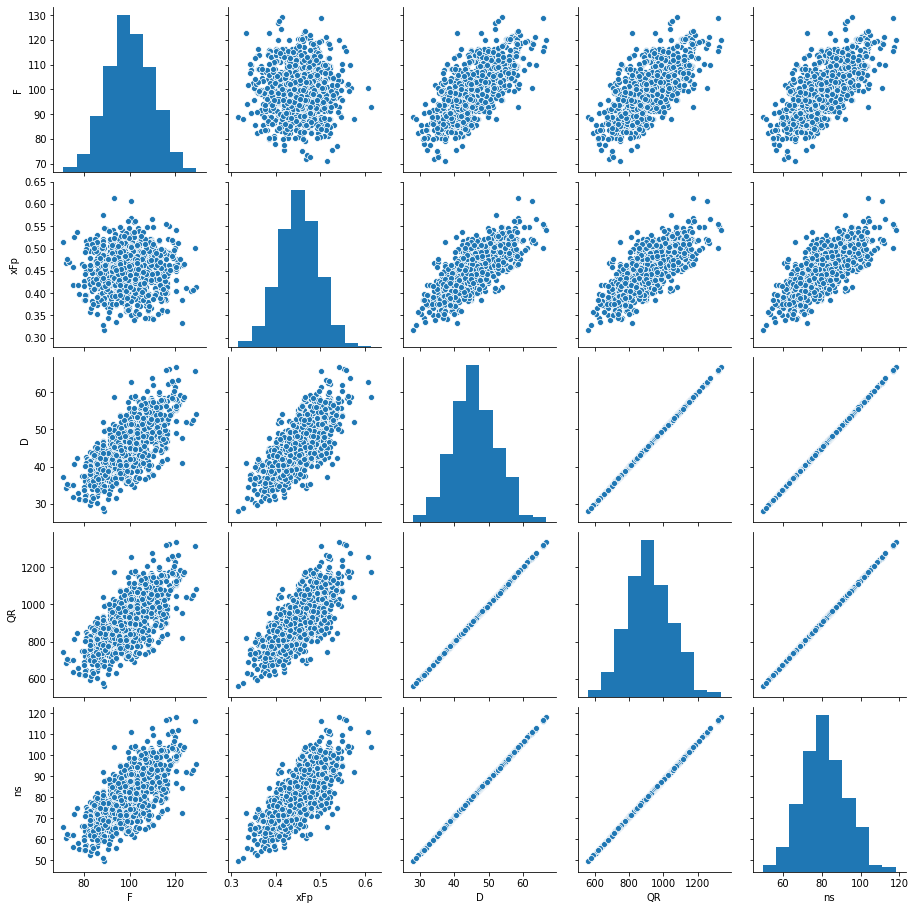

In [11]:
sns.pairplot(df)

The values of `F` and `xFp` are normally distributed as expected, and since these values form inputs to `generate_data`, `D`, `QR` and `ns` are also normally distributed.

Focusing on the bottom right hand corner of the figure it is observed that as `F` and `xFp` increase, `ns` increases as expected from the equationss developed previously.

A correlation heatmap shows that `F` and `xFp` strongly influence `ns`. Since `D` and `QR` are intermediate values when calculating `ns`, there is perfect correlation between these values. As a result, `D` and `QR` can be dropped from the data.

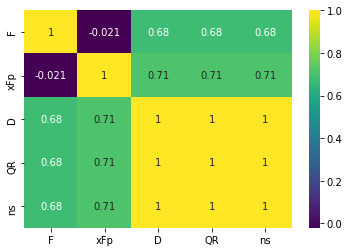

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [13]:
df = df.drop(['D', 'QR'], axis = 1)

A preview of the dataset is as follows:

In [14]:
df.head()

,F,xFp,ns
0,103.800995,0.496630,93.062704
1,100.608221,0.443023,80.055303
2,98.076094,0.485872,85.945372
3,98.149431,0.421334,74.094743
4,99.846821,0.405567,72.414703


## 6. Data Preparation

To prepare the data for use in a machine learning model, the following code executes three steps:
1. Split dataframe into features `X` and targets `y`
2. Create a 60/40 train test split
3. Scale the features of the data based on the training set only (not strictly necessary for linear regression but done  to make coefficient comparison easier)

In [15]:
X = df.drop('ns', axis = 1)
y = df['ns']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 7. Machine Learning Model Development

A linear regression model is trained using the scikit-learn python package with the following code:

In [18]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The regression coefficients are shown below. In Section 5.3 it was shown with the correlation heatmap that the feed pentane composition had a slightly higher influence on the steam flow rate, which is reflected in the regression coefficient for `xFp` being slightly higher than for `F`.

In [19]:
print('Regression coefficient for Feed Flowrate (F): ', lm.coef_[0])
print('Regression coefficient for Feed Composition (xFp): ', lm.coef_[1])
print('Intercept: ', lm.intercept_)

Regression coefficient for Feed Flowrate (F):  7.932992845282557
Regression coefficient for Feed Composition (xFp):  8.439821781281053
Intercept:  81.37504334840132


The trained model is used to generate predictions on the test set:

In [20]:
predictions = lm.predict(X_test)

The predictions on the test set are compared against the true values using the MAE:

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

r2_score = round(r2_score(y_test, predictions), 3)
mae = round(mean_absolute_error(y_test, predictions), 3)

print('R2 Score: ', r2_score)
print('MAE (kmol/h): ', mae)

R2 Score:  0.995
MAE (kmol/h):  0.524


The linear regression model has a MAE of 0.524 kmol/h (9.44 kg/h) on the test set, which is a 0.65% relative error compared to the average value (the baseline of 80.9 kmol/h, from Section 5.1) and well within one standard deviation (11.4 kmol/h, from Section 5.2). In practical terms, the model is capable of predicting the necessary reboiler steam flow rate to within 0.524 kmol/h, given the feed flow rate and composition to the distillation column. 

Although the problem considered here is extremely simple, it illustrates how machine learning can model an industrial process with a high degree of accuracy. If operating data is available that represents the process being considered, then a good option for process modelling could be to take advantage of the data and use machine learning to model the relationship between process conditions.

Distillation is a process that requires a large amount of energy, since fluids must be heated or cooled, as well as transported to and from the column using pumps. A machine learning model that can accurately predict the reboiler duty as the feed changes could potentially reduce the reboiler duty requirements and the time spent off-spec during operation by providing an instantaneous value for the saturated steam flow rate, rather than having to wait for a traditional control system to return the column to specifiation by adjusting the steam flow rate to adapt to a feed change. 

## 8. Conclusion

A distillation process has been considered, where the feed flow rate and composition are varied and the reboiler steam flow rate must also change to maintain the bottoms product specification. A linear regression machine learning model has been developed using scikit-learn to predict the reboiler steam flow rate, given the feed flow rate and composition, that has a mean absolute error (MAE) of 0.524. 

## 9. Recommendations

There is opportunity to expand on the concept presented in this project. Some ideas for future work are:

* A similar approach could be applied to predicting the energy required in the condenser, or to predicting the compositions of the distillate or bottoms streams, depending on what the application is.
* Since the machine learning model predicts a value that is expected based on feed conditions to the process, it could be used for anomaly detection if the expected value is compared to the actual value. For example, if more steam is actually used than what is expected from the model, then perhaps the reboiler has fouling issues.
* Further work could be done to explore how much benefit there could be in using the prediction from a machine learning model with a process control system.

## 10. References

[1] Seader, Henley, and Roper, *Separation Process Principles,* 3rd edition, Wiley, 2011.

[2] Felder and Rousseau, *Elementary Principles of Chemical Processes,* 3rd edition, Wiley, 2005.